In [95]:
import numpy as np
import MixtureOptDesign





In [96]:
import random

In [97]:
random.seed(124)

In [98]:
from MixtureOptDesign import generate_simplex_lattice_design, generate_initial_design

In [99]:
from MixtureOptDesign import vns

In [100]:
lattice_design = generate_simplex_lattice_design(3,25)


In [101]:
lattice_design.shape

(351, 3)

In [102]:
MixtureOptDesign.MNLVis.plot_ternary_design(lattice_design.T.reshape(3,1,351))

In [103]:
beta = MixtureOptDesign.generate_beta_params(7,3)


In [104]:
# set up initial optimality value
best_optimality_value = float('inf')

In [105]:
design = np.array([[[0.96, 0.16, 0.64, 0.52, 0.16, 0.96, 0.16, 0.52, 0.16, 0.64,
         0.36, 0.56, 0.16, 0.  , 0.16, 0.52],
        [0.32, 0.64, 0.  , 0.56, 0.52, 0.2 , 0.52, 0.36, 0.56, 0.36,
         0.32, 0.32, 0.36, 0.36, 0.2 , 0.2 ]],

       [[0.04, 0.36, 0.12, 0.  , 0.04, 0.04, 0.36, 0.  , 0.04, 0.12,
         0.56, 0.28, 0.04, 0.12, 0.04, 0.  ],
        [0.6 , 0.12, 0.12, 0.28, 0.  , 0.12, 0.  , 0.56, 0.28, 0.56,
         0.6 , 0.6 , 0.56, 0.56, 0.12, 0.12]],

       [[0.  , 0.48, 0.24, 0.48, 0.8 , 0.  , 0.48, 0.48, 0.8 , 0.24,
         0.08, 0.16, 0.8 , 0.88, 0.8 , 0.48],
        [0.08, 0.24, 0.88, 0.16, 0.48, 0.68, 0.48, 0.08, 0.16, 0.08,
         0.08, 0.08, 0.08, 0.08, 0.68, 0.68]]])

In [106]:


for iteration in range(1):
    
    # set up flag variable
    success = False

    # loop until success is True
    while not success:
        try:
            # generate initial design
            initial_design, lattice_points, other_points = generate_initial_design(lattice_design)


            # calculate optimality value
            current_optimality_value = MixtureOptDesign.get_i_optimality_mnl(initial_design, 3, beta)
            
            # if no exception is raised, set success to True
            success = True
            
        except np.linalg.LinAlgError as e:
            print(f"Singular matrix: {e}")
        except ValueError:
            print("ValueError")
        except:
            print("Exception")
        
    # do something with i_opt_value if the code runs successfully
    if current_optimality_value < best_optimality_value and current_optimality_value >0 :
        
        best_optimality_value = current_optimality_value
        best_design = initial_design.copy()
        best_lattice_points = lattice_points.copy()
        best_other_points = other_points.copy()

In [107]:
best_optimality_value

91.45310691063631

In [108]:
current_optimality_value

91.45310691063631

In [109]:
vns_desgin,vni_i_value = vns(best_design,best_other_points,beta)

Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!


In [110]:
vni_i_value

0.4867981991727499

In [111]:
beta_= np.array([-0.79482718, -0.19781423, -0.39415532,  0.14392659,  2.14268707, 0.9039211 ])

In [112]:
best_design_ = np.array([[[0.56, 1.  , 0.44, 0.  , 1.  , 0.44, 0.12, 0.56, 0.12, 0.12,
         0.44, 0.28, 0.12, 1.  , 0.  , 0.12],
        [0.52, 0.  , 0.  , 0.52, 0.44, 0.  , 0.  , 0.28, 0.44, 0.  ,
         0.  , 0.52, 0.52, 0.  , 0.28, 0.12]],

       [[0.32, 0.  , 0.  , 0.12, 0.  , 0.28, 0.76, 0.32, 0.44, 0.44,
         0.28, 0.32, 0.76, 0.  , 0.  , 0.76],
        [0.48, 0.12, 0.  , 0.48, 0.28, 0.12, 0.  , 0.32, 0.  , 0.  ,
         0.  , 0.48, 0.48, 0.  , 0.32, 0.44]],

       [[0.12, 0.  , 0.56, 0.88, 0.  , 0.28, 0.12, 0.12, 0.44, 0.44,
         0.28, 0.4 , 0.12, 0.  , 1.  , 0.12],
        [0.  , 0.88, 1.  , 0.  , 0.28, 0.88, 1.  , 0.4 , 0.56, 1.  ,
         1.  , 0.  , 0.  , 1.  , 0.4 , 0.44]]])

In [113]:
best_lattice_points_= np.array([[1.  , 0.  , 0.  ],
       [0.12, 0.76, 0.12],
       [0.56, 0.32, 0.12],
       [0.44, 0.28, 0.28],
       [0.12, 0.44, 0.44],
       [0.44, 0.  , 0.56],
       [0.  , 0.  , 1.  ],
       [0.  , 0.12, 0.88],
       [0.28, 0.32, 0.4 ],
       [0.52, 0.48, 0.  ]])

In [114]:
def unique_rows(design:np.ndarray)->np.ndarray:
    q,j,s = design.shape
    arr = design.T.reshape(j*s,q)
    return np.unique(arr,axis=0)

In [115]:
unique_rows(vns_desgin)

array([[0.  , 0.  , 1.  ],
       [0.  , 0.56, 0.44],
       [0.  , 1.  , 0.  ],
       [0.28, 0.28, 0.44],
       [0.32, 0.6 , 0.08],
       [0.72, 0.04, 0.24],
       [1.  , 0.  , 0.  ]])

In [116]:
MixtureOptDesign.MNLVis.plot_ternary_design(vns_desgin)

In [117]:
beta = MixtureOptDesign.generate_beta_params(7,3)

In [118]:
design = MixtureOptDesign.get_random_initial_design_mnl(3,2,16,seed=124)
design1 = MixtureOptDesign.get_random_initial_design_mnl(3,3,40,seed=124)
design2 = MixtureOptDesign.get_random_initial_design_mnl(3,4,40,seed=124)
design3 = MixtureOptDesign.get_random_initial_design_mnl(3,5,40,seed=124)

In [119]:

from MixtureOptDesign.data.csv_util import read_csv_file
design_rus = read_csv_file("Tests/data/design_03.csv")

In [120]:
MixtureOptDesign.MNLVis.plot_ternary_design(design_rus)


In [121]:
MixtureOptDesign.MNLVis.plot_ternary_design(design1)


In [122]:
MixtureOptDesign.MNLVis.plot_ternary_design(design2)


In [123]:
MixtureOptDesign.MNLVis.plot_ternary_design(design3)

In [124]:
coord_exchange = MixtureOptDesign.CoordinateExchangeIOptimal(design,3,30)

In [125]:

coord_exchange1 = MixtureOptDesign.CoordinateExchangeIOptimal(design1,3,30)
coord_exchange2 = MixtureOptDesign.CoordinateExchangeIOptimal(design2,3,30)
coord_exchange3 = MixtureOptDesign.CoordinateExchangeIOptimal(design3,3,30)

In [126]:
optimal_design = coord_exchange.optimize_design()

In [127]:

optimal_design1 = coord_exchange1.optimize_design()
optimal_design2 = coord_exchange2.optimize_design()
optimal_design3 = coord_exchange3.optimize_design()

In [128]:
MixtureOptDesign.MNLVis.plot_ternary_design(optimal_design)

In [129]:
MixtureOptDesign.MNLVis.plot_ternary_design(optimal_design1)

In [130]:
MixtureOptDesign.MNLVis.plot_ternary_design(optimal_design2)

In [131]:
MixtureOptDesign.MNLVis.plot_ternary_design(optimal_design3)

In [132]:
h_clust = MixtureOptDesign.HierarchicalCluster(optimal_design,)

In [133]:
h_clust.fit(15)

In [134]:
clust_design = h_clust.design().T.reshape(optimal_design.shape)

In [135]:
clust_design.shape

(3, 2, 16)

In [136]:
MixtureOptDesign.MNLVis.plot_ternary_design(clust_design)

In [138]:
MixtureOptDesign.MNLVis.plot_ternary_design(design)

In [139]:
beta = coord_exchange.get_beta()

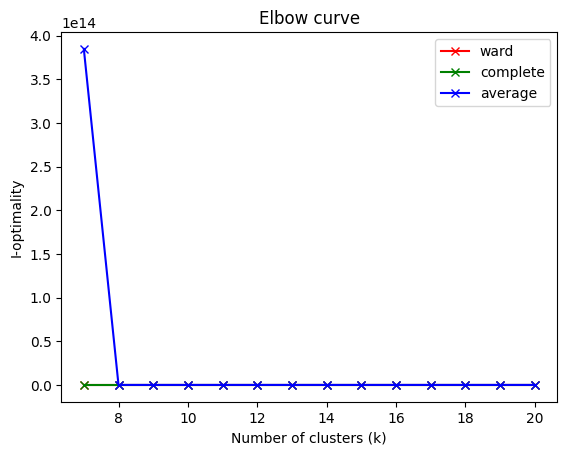

     Method             7         8        9        10        11        12  \
0      ward  4.915874e-01  0.473166  0.46694  0.464373  0.449306  0.443664   
1  complete  5.217646e-01  0.473166  0.46694  0.464373  0.462499  0.447301   
2   average  3.846898e+14  0.473166  0.46694  0.464373  0.462499  0.447301   

         13       14       15        16        17        18        19  \
0  0.442048  0.44149  0.44136  0.441178  0.441237  0.441238  0.441238   
1  0.442048  0.44149  0.44136  0.441420  0.441237  0.441238  0.441238   
2  0.442048  0.44149  0.44149  0.441420  0.441237  0.441238  0.441238   

         20  
0  0.441238  
1  0.441238  
2  0.441238  


In [140]:
h_clust.get_elbow_curve(beta,3)

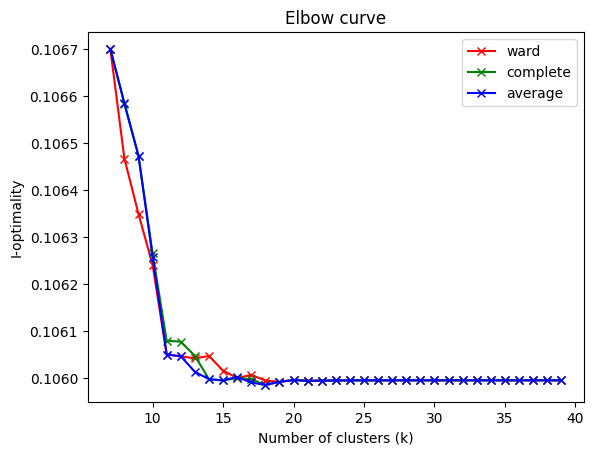

     Method       7         8         9        10        11        12  \
0      ward  0.1067  0.106467  0.106349  0.106241  0.106050  0.106046   
1  complete  0.1067  0.106583  0.106472  0.106265  0.106079  0.106077   
2   average  0.1067  0.106584  0.106472  0.106258  0.106050  0.106046   

         13        14        15  ...        30        31        32        33  \
0  0.106042  0.106047  0.106016  ...  0.105995  0.105995  0.105995  0.105995   
1  0.106047  0.105998  0.105995  ...  0.105995  0.105995  0.105995  0.105995   
2  0.106013  0.105998  0.105995  ...  0.105995  0.105995  0.105995  0.105995   

         34        35        36        37        38        39  
0  0.105995  0.105995  0.105995  0.105995  0.105995  0.105995  
1  0.105995  0.105995  0.105995  0.105995  0.105995  0.105995  
2  0.105995  0.105995  0.105995  0.105995  0.105995  0.105995  

[3 rows x 34 columns]


In [141]:
h_clust = MixtureOptDesign.HierarchicalCluster(optimal_design1,)
beta = coord_exchange1.get_beta()
h_clust.get_elbow_curve(beta,3)

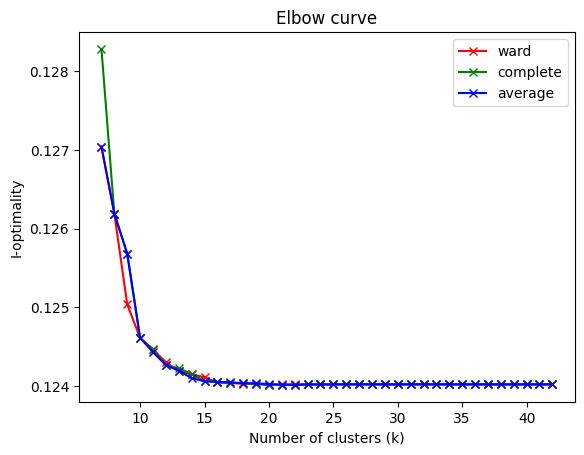

     Method         7         8         9        10        11        12  \
0      ward  0.127042  0.126191  0.125037  0.124609  0.124465  0.124298   
1  complete  0.128285  0.126191  0.125681  0.124609  0.124456  0.124263   
2   average  0.127042  0.126191  0.125681  0.124609  0.124429  0.124263   

         13        14        15  ...        33        34        35        36  \
0  0.124189  0.124145  0.124110  ...  0.124019  0.124018  0.124018  0.124018   
1  0.124223  0.124151  0.124059  ...  0.124019  0.124018  0.124018  0.124018   
2  0.124193  0.124097  0.124059  ...  0.124019  0.124018  0.124018  0.124018   

         37        38        39        40        41        42  
0  0.124018  0.124018  0.124018  0.124018  0.124018  0.124018  
1  0.124018  0.124018  0.124018  0.124018  0.124018  0.124018  
2  0.124018  0.124018  0.124018  0.124018  0.124018  0.124018  

[3 rows x 37 columns]


In [142]:
h_clust = MixtureOptDesign.HierarchicalCluster(optimal_design2,)
beta = coord_exchange2.get_beta()
h_clust.get_elbow_curve(beta,3)

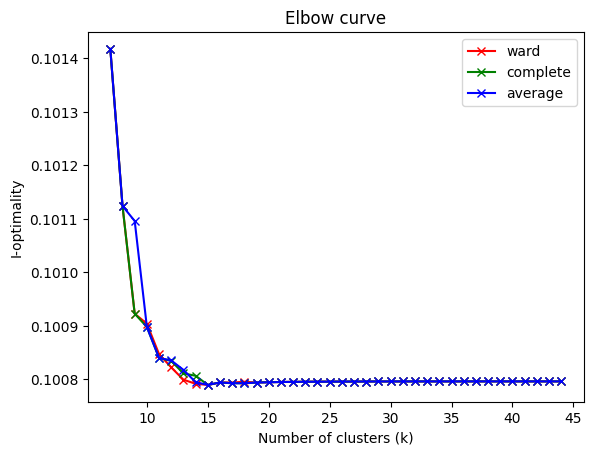

     Method         7         8         9        10        11        12  \
0      ward  0.101418  0.101124  0.100923  0.100904  0.100847  0.100822   
1  complete  0.101418  0.101124  0.100923  0.100898  0.100840  0.100834   
2   average  0.101418  0.101124  0.101096  0.100898  0.100840  0.100835   

         13        14        15  ...        35        36        37        38  \
0  0.100799  0.100792  0.100789  ...  0.100796  0.100796  0.100796  0.100796   
1  0.100811  0.100807  0.100789  ...  0.100796  0.100796  0.100796  0.100796   
2  0.100818  0.100795  0.100789  ...  0.100796  0.100796  0.100796  0.100796   

         39        40        41        42        43        44  
0  0.100796  0.100796  0.100796  0.100796  0.100796  0.100796  
1  0.100796  0.100796  0.100796  0.100796  0.100796  0.100796  
2  0.100796  0.100796  0.100796  0.100796  0.100796  0.100796  

[3 rows x 39 columns]


In [143]:
h_clust = MixtureOptDesign.HierarchicalCluster(optimal_design3,)
beta = coord_exchange3.get_beta()
h_clust.get_elbow_curve(beta,3)

In [144]:
h_clust = MixtureOptDesign.HierarchicalCluster(design,)

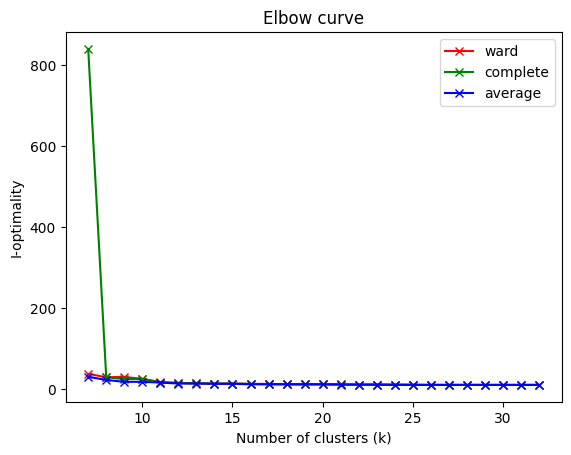

     Method           7          8          9         10         11  \
0      ward   37.912818  29.314627  30.227643  25.365809  17.741256   
1  complete  840.534774  29.314627  24.836056  25.365809  16.237808   
2   average   30.529847  22.733457  18.017691  18.126657  16.160565   

          12         13         14         15  ...         23         24  \
0  15.315274  14.340029  13.813488  13.813797  ...  11.157052  11.147941   
1  15.315274  14.340029  13.813488  13.813797  ...  11.148706  11.117626   
2  13.791868  13.875955  13.074718  13.060749  ...  11.125506  10.423891   

          25         26         27         28         29         30  \
0  11.116098  10.414667  10.444403  10.438575  10.419368  10.419775   
1  10.412503  10.414667  10.444403  10.438575  10.419368  10.419775   
2  10.412503  10.437677  10.444403  10.438575  10.419368  10.419775   

          31         32  
0  10.419775  10.419775  
1  10.419775  10.419775  
2  10.419775  10.419775  

[3 rows x 27 columns

In [145]:
h_clust.get_elbow_curve(beta,3)

In [146]:
beta = np.array((0.86, 0.21, 3.07, 2.34, 3.24, -20.59))

In [147]:
id_matrix = np.identity(7)
sigma_matrix = MixtureOptDesign.transform_varcov_matrix(id_matrix,3)

In [148]:
Sigma_prime = MixtureOptDesign.transform_varcov_matrix(id_matrix,3)
Sigma_prime

array([[2., 1., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [150]:
draws = MixtureOptDesign.HaltonDraws(beta,sigma_matrix,128)
draws = draws.generate_draws()
draws.shape

(128, 6)

In [151]:
np.cov(draws.T)

array([[ 1.98067618,  0.90074196, -0.02668339, -0.00867566, -0.02727861,
        -0.04356336],
       [ 0.90074196,  1.85572306, -0.03910241, -0.06226417, -0.04581626,
        -0.03397161],
       [-0.02668339, -0.03910241,  1.00334998, -0.02436339, -0.02556245,
        -0.00473482],
       [-0.00867566, -0.06226417, -0.02436339,  0.97310663, -0.02585229,
        -0.03732686],
       [-0.02727861, -0.04581626, -0.02556245, -0.02585229,  0.97254625,
        -0.04516292],
       [-0.04356336, -0.03397161, -0.00473482, -0.03732686, -0.04516292,
         0.9247679 ]])

In [152]:
draw_q = MixtureOptDesign.QMCHaltonDraws(beta,sigma_matrix,128)

In [153]:
draw_q = draw_q.generate_draws()

In [154]:
np.cov(draw_q.T)

array([[ 2.00867602e+00,  1.00685713e+00, -2.71683915e-02,
         1.29686162e-02,  2.00574586e-02,  7.34587244e-02],
       [ 1.00685713e+00,  1.99822989e+00,  1.62256764e-02,
        -2.69441738e-02, -8.83414804e-02, -9.01377468e-05],
       [-2.71683915e-02,  1.62256764e-02,  9.80753047e-01,
         2.26005970e-02,  2.85576795e-02, -3.11925667e-02],
       [ 1.29686162e-02, -2.69441738e-02,  2.26005970e-02,
         9.79048018e-01, -4.66633137e-04, -5.53906588e-02],
       [ 2.00574586e-02, -8.83414804e-02,  2.85576795e-02,
        -4.66633137e-04,  1.01557984e+00, -1.64498429e-02],
       [ 7.34587244e-02, -9.01377468e-05, -3.11925667e-02,
        -5.53906588e-02, -1.64498429e-02,  9.87705065e-01]])

In [155]:
from MixtureOptDesign.data.csv_util import read_csv_file
from MixtureOptDesign.data.csv_util import write_csv_file

In [156]:
design = read_csv_file("Tests/data/design_03.csv")
beta = np.array( (1.36, 1.57, 2.47, -0.43, 0.50, 1.09))
I_opt_value = MixtureOptDesign.get_i_optimality_mnl(design,3,beta)

In [157]:
design.shape

(3, 2, 16)

In [158]:
design = design.reshape(3,1,32)


In [159]:
design

array([[[0.        , 1.        , 0.        , 0.02957512, 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 0.        , 0.45197098, 0.        , 0.        ,
         0.        , 0.58200381, 0.35964544, 0.58237279, 0.29144899,
         0.        , 0.29659338, 0.        , 0.64710216, 0.30498195,
         0.57495804, 0.2965895 , 0.29656323, 0.23124625, 0.4995261 ,
         0.48627423, 0.29653484]],

       [[0.        , 0.        , 0.        , 0.97042488, 0.        ,
         0.        , 0.        , 1.        , 0.        , 0.49189019,
         0.        , 0.        , 0.        , 0.41474081, 0.        ,
         0.        , 0.        , 0.64035456, 0.        , 0.27550328,
         0.62909717, 0.34165454, 0.6284131 , 0.35289784, 0.1642255 ,
         0.42504196, 0.34164094, 0.34168565, 0.52977098, 0.19010316,
         0.51372577, 0.34170748]],

       [[1.        , 0.        , 1.        , 0.        , 1.        ,
         1.        , 1.        

In [160]:
np.unique(design,axis=2).shape

(3, 1, 24)

In [161]:
np.all(design == np.array([0.5, 0.5, 0]).reshape(3,1,1), axis=0)

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False]])

In [162]:
 np.array([0.5, 0.5, 0]).reshape(1,1,3)

array([[[0.5, 0.5, 0. ]]])

In [163]:
indices = np.where(np.all(design == np.array([0.5, 0.5, 0]).reshape(3,1,1), axis=0))

In [164]:
indices[0]

array([], dtype=int64)

In [165]:
subset =design[:,indices[0],indices[1]]

In [166]:
subset

array([], shape=(3, 0), dtype=float64)

In [167]:
subset = np.zeros(subset.shape) + np.array([1,4,5]).reshape(3,1,1)


print(subset)

[]


In [168]:
subset = design[:, :, [24, 26]]
design[:, :, [24, 26]] = np.ones(subset.shape) * np.array([2, 5, 3])
print(subset)


ValueError: operands could not be broadcast together with shapes (3,1,2) (3,) 

In [169]:
design = read_csv_file("Tests/data/design_04.csv")
        
beta = np.array((0.86, 0.21, 3.07, 2.34, 3.24, -20.59))
I_opt_value = MixtureOptDesign.get_i_optimality_mnl(design,3,beta)

In [170]:
h_clust = MixtureOptDesign.HierarchicalCluster(design)

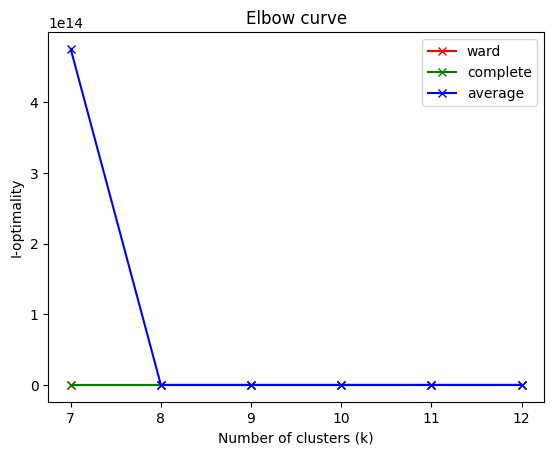

     Method             7         8         9        10        11        12
0      ward  3.747265e+00  2.725262  2.335371  2.320321  2.280279  2.292975
1  complete  3.592548e+00  2.725262  2.335371  2.320321  2.280279  2.292975
2   average  4.758089e+14  2.725262  2.335371  2.320321  2.280279  2.292975


In [171]:
h_clust.get_elbow_curve(beta,3)

In [173]:
import matplotlib.pyplot as plt

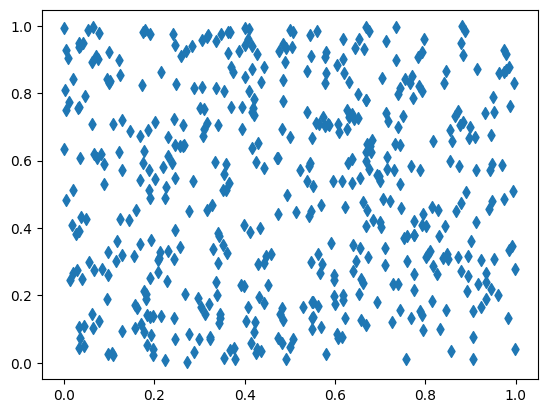

In [174]:
n = 500
x1 = np.random.uniform(0,1,int(n))
x2 = np.random.uniform(0,1,int(n))

plt.scatter(x1,x2, marker='d')

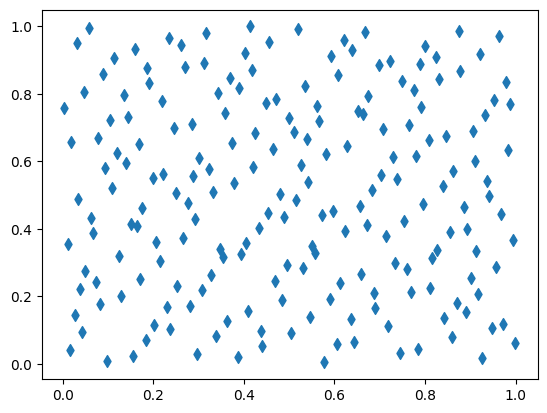

In [175]:
from scipy.stats import qmc

def halton(n, d=1):
    sampler = qmc.Halton(d, scramble=True)
    return sampler.random(n)

def halton_norm(n, d=1):
    sampler = qmc.Halton(d, scramble=True)
    x_halton = sampler.random(n)
    return stats.norm.ppf(x_halton)
    
x = halton(n=200, d=2).T
plt.scatter(x[0],x[1], marker='d')